# Mental Health in Tech Workplace using ML Techniques

## Dataset Description

The dataset is called "Mental Health in Tech Survey" and it is a single CSV file that can be 
found on the Kaggle website. Open Sourcing Mental Illness, LTD acquired this dataset in 
2014 and made it available as open source. The collection comprises data from several 
nations and regions on attitudes toward mental health and the frequency of mental health 
issues in the IT sector.
Link to the dataset: https://www.kaggle.com/datasets/osmi/mental-health-in-tech-survey

In [58]:
import pandas as pd

In [59]:
df = pd.read_csv('survey.csv')

## Overview about the Dataset

Before start wokring on our dataset, we need firsrt to understand it.
### Columns

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

Our dataset contains 27 columns. Only the 'Age' column is an integer data type, other columns are object data type. Here is a description of each one of them.

Timestamp

Age

Gender

Country

state: If you live in the United States, which state or territory do you live in?

self_employed: Are you self-employed?

family_history: Do you have a family history of mental illness?

treatment: Have you sought treatment for a mental health condition?

work_interfere: If you have a mental health condition, do you feel that it interferes with your work?

no_employees: How many employees does your company or organization have?

remote_work: Do you work remotely (outside of an office) at least 50% of the time?

tech_company: Is your employer primarily a tech company/organization?

benefits: Does your employer provide mental health benefits?

care_options: Do you know the options for mental health care your employer provides?

wellness_program: Has your employer ever discussed mental health as part of an employee wellness program?

seek_help: Does your employer provide resources to learn more about mental health issues and how to seek help?

anonymity: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?

leave: How easy is it for you to take medical leave for a mental health condition?

mentalhealthconsequence: Do you think that discussing a mental health issue with your employer would have negative consequences?

physhealthconsequence: Do you think that discussing a physical health issue with your employer would have negative consequences?

coworkers: Would you be willing to discuss a mental health issue with your coworkers?

supervisor: Would you be willing to discuss a mental health issue with your direct supervisor(s)?

mentalhealthinterview: Would you bring up a mental health issue with a potential employer in an interview?

physhealthinterview: Would you bring up a physical health issue with a potential employer in an interview?

mentalvsphysical: Do you feel that your employer takes mental health as seriously as physical health?

obs_consequence: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?

comments: Any additional notes or comments

### Rows
Here is an overview about the number of rows in our dataset. In this case, it is the number of people who are working on tech industry, and they were very kind to share their personal information concerning their mental and physical health. Thanks to them, we will be able to contribute to this open source project.

In [61]:
len(df)

1259

### Country Column Overviewl

#### Data geographic distribution
We looked at the data and discovered that the bulk of respondents were from the United States and the United Kingdom (have more than 100 respondents).

In [62]:
df['Country'].unique()

array(['United States', 'Canada', 'United Kingdom', 'Bulgaria', 'France',
       'Portugal', 'Netherlands', 'Switzerland', 'Poland', 'Australia',
       'Germany', 'Russia', 'Mexico', 'Brazil', 'Slovenia', 'Costa Rica',
       'Austria', 'Ireland', 'India', 'South Africa', 'Italy', 'Sweden',
       'Colombia', 'Latvia', 'Romania', 'Belgium', 'New Zealand',
       'Zimbabwe', 'Spain', 'Finland', 'Uruguay', 'Israel',
       'Bosnia and Herzegovina', 'Hungary', 'Singapore', 'Japan',
       'Nigeria', 'Croatia', 'Norway', 'Thailand', 'Denmark',
       'Bahamas, The', 'Greece', 'Moldova', 'Georgia', 'China',
       'Czech Republic', 'Philippines'], dtype=object)

In [63]:
df['Country'].value_counts()

United States             751
United Kingdom            185
Canada                     72
Germany                    45
Ireland                    27
Netherlands                27
Australia                  21
France                     13
India                      10
New Zealand                 8
Poland                      7
Switzerland                 7
Sweden                      7
Italy                       7
South Africa                6
Belgium                     6
Brazil                      6
Israel                      5
Singapore                   4
Bulgaria                    4
Austria                     3
Finland                     3
Mexico                      3
Russia                      3
Denmark                     2
Greece                      2
Colombia                    2
Croatia                     2
Portugal                    2
Moldova                     1
Georgia                     1
Bahamas, The                1
China                       1
Thailand  

In [64]:
round((df['Country'].value_counts()*100)/(df['Country'].count()),2)

United States             59.65
United Kingdom            14.69
Canada                     5.72
Germany                    3.57
Ireland                    2.14
Netherlands                2.14
Australia                  1.67
France                     1.03
India                      0.79
New Zealand                0.64
Poland                     0.56
Switzerland                0.56
Sweden                     0.56
Italy                      0.56
South Africa               0.48
Belgium                    0.48
Brazil                     0.48
Israel                     0.40
Singapore                  0.32
Bulgaria                   0.32
Austria                    0.24
Finland                    0.24
Mexico                     0.24
Russia                     0.24
Denmark                    0.16
Greece                     0.16
Colombia                   0.16
Croatia                    0.16
Portugal                   0.16
Moldova                    0.08
Georgia                    0.08
Bahamas,

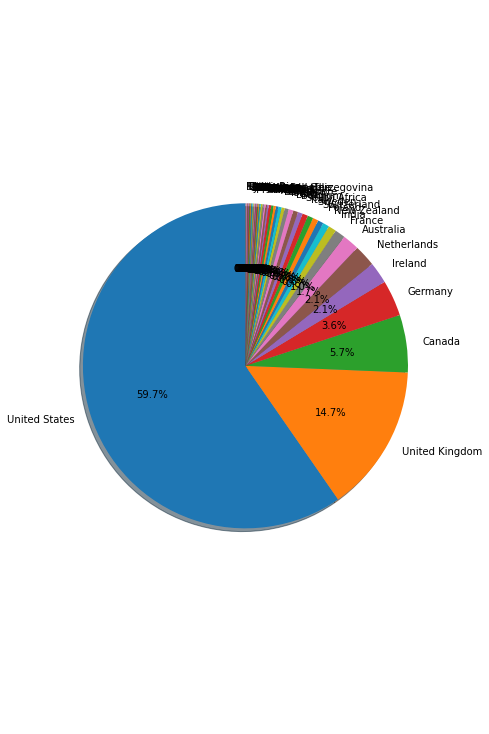

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline

fig1 = plt.figure(figsize=(10,10))
ax1 = fig1.add_axes((0,0,.5,1))
labels =  df['Country'].value_counts().index
sizes = df['Country'].value_counts()
percentages = sizes / 1259 * 100

ax1.pie(percentages, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')

plt.savefig('distributionofsurvey.png')

plt.show()

plt.close()

#### Gender Distribution
We noticed that 'Gender' column contains some inconsistency values, which means we can have an insight from this column without cleaning it first. 

In [66]:
df['Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [67]:
df['Gender'].value_counts()

Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Male                                                3
Woman                                               3
Cis Male                                            2
Man                                                 2
Female (trans)                                      2
Female                                              2
Trans woman                                         1
msle                                                1
male leaning androgynous                            1
Neuter                      

#### Age Distribution
While discovering our dataset, we found that the 'Age' column contains out of the range or illogical values. Same as 'Gender' column, 'Age' column also needs some clean up before starting working on it.

In [68]:
df['Age'].unique()

array([         37,          44,          32,          31,          33,
                35,          39,          42,          23,          29,
                36,          27,          46,          41,          34,
                30,          40,          38,          50,          24,
                18,          28,          26,          22,          19,
                25,          45,          21,         -29,          43,
                56,          60,          54,         329,          55,
       99999999999,          48,          20,          57,          58,
                47,          62,          51,          65,          49,
             -1726,           5,          53,          61,           8,
                11,          -1,          72], dtype=int64)

#### Missing Values in the dataset
In this part, we were interested to have an insight about the percentage of missing (null) values in our dataset in order to clean it up either by filling those null values or by dropping column. Cleaning up the missing values helps us to avoid data bias.

In [69]:
total_nulls = df.isnull().sum().sort_values(ascending=False)
perc_nulls = round((total_nulls*100)/len(df),2)
nulls = pd.concat([total_nulls, perc_nulls], axis=1, keys=['Total','Percentage'])
nulls

,Total,Percentage
comments,1095,86.97
state,515,40.91
work_interfere,264,20.97
self_employed,18,1.43
seek_help,0,0.00
obs_consequence,0,0.00
mental_vs_physical,0,0.00
phys_health_interview,0,0.00
mental_health_interview,0,0.00
supervisor,0,0.00


Based on the observation, we can clearly see that the 'comment' column has a lot of missing data (it is almost 87%). This percentage is normal because the comment section in the survey usually is optional. For this project we can drop this column since it does not contain any useful information for our analysis.
The second most missing values are in 'state' column. This column contains data related only to teh United Satate.

### Data Cleaning
#### Irrelevant Data
Dropping columns that do not contribute any useful information to data analysis.
There are many columns that do not contribute much to the analysis such Timestap, Comment because it contains a lot of null values, and also state because it is manily related to United State.

In [70]:
df.drop(columns=['Timestamp','comments','state'],inplace=True)

#### Value out of range
There are a couple of illogical values in 'Age' column such as negative values, lower than 16 (in the terms of the law, they are not allowed to work), or higher than 100. We will drop all those illogical value to avoid any bias in our data.

In [71]:
df = df[(df['Age'] >=16) & (df['Age']<=65)]

In [72]:
import numpy as np
np.sort(df['Age'].unique())

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       53, 54, 55, 56, 57, 58, 60, 61, 62, 65], dtype=int64)

#### Inconsistency in input value
We noticed there are so many inconsistency in the Gender's input data. We decide to transform anything related to male such as m, mail, M, ect. into lowercase 'male', same to 'female' ,and any other gender identifications are 'other'.

In [73]:
#Let have a second look on the 'Gender' column values
df.Gender.unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'Enby', 'fluid',
       'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'Malr', 'femail',
       'Cis Man', 'ostensibly male, unsure what that really means'],
      dtype=object)

In [74]:
#First let convert all the values to lowercase
df.Gender = df.Gender.str.lower()

In [75]:
df.Gender.unique()

array(['female', 'm', 'male', 'male-ish', 'maile', 'trans-female',
       'cis female', 'f', 'something kinda male?', 'cis male', 'woman',
       'mal', 'male (cis)', 'queer/she/they', 'non-binary', 'femake',
       'make', 'nah', 'enby', 'fluid', 'genderqueer', 'female ',
       'androgyne', 'agender', 'cis-female/femme', 'guy (-ish) ^_^',
       'male leaning androgynous', 'male ', 'man', 'trans woman', 'msle',
       'neuter', 'female (trans)', 'queer', 'female (cis)', 'mail',
       'malr', 'femail', 'cis man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [76]:
#let create an array that conatins all the values that identify male
male = ['male','m','make','male-ish', 'maile', 'cis male','mal','male (cis)','guy (-ish) ^_^','male ','man','msle','mail','malr','cis man']

#let create an array that contains all the values that identify female
female = ['female','f','woman','cis female','femake','female ', 'cis-female/femme','female (cis)','femail']

#Any other answer that does not contain a value in (male, female) we will consider it as other
other = ['trans-female','queer/she/they','non-binary','nah', 'all', 'enby', 'fluid', 'genderqueer','androgyne','agender', 'male leaning androgynous','trans woman','neuter','something kinda male?', 'female (trans)', 'queer', 'a little about you','p','ostensibly male, unsure what that really means']


In [77]:
#Now let filter all the vlaue into three main values (male, female, other)

df.Gender.loc[df.Gender.isin(male)]= 'male'
df.Gender.loc[df.Gender.isin(female)]= 'female'
df.Gender.loc[df.Gender.isin(other)]= 'other'

C:\Users\ziana-pc\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [78]:
df.Gender.unique()

array(['female', 'male', 'other'], dtype=object)

In [79]:
df.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,female,United States,NaN,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,male,United States,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,male,Canada,NaN,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,male,United States,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [80]:
df.Gender.value_counts()

male      987
female    246
other      17
Name: Gender, dtype: int64

#### Missing values (nulls)
As we mentioned before, we dropped 'comments' and 'state' columnns because they contain irrelevent data. However, the dataset still contains some missing value which can lead to have bias in our result. As a next step is to handle the missing data.


In [81]:
total_nulls = df.isnull().sum().sort_values(ascending=False)
perc_nulls = round((total_nulls*100)/len(df),2)
nulls = pd.concat([total_nulls, perc_nulls], axis=1, keys=['Total','Percentage'])
nulls

,Total,Percentage
work_interfere,262,20.96
self_employed,18,1.44
Age,0,0.00
seek_help,0,0.00
mental_vs_physical,0,0.00
phys_health_interview,0,0.00
mental_health_interview,0,0.00
supervisor,0,0.00
coworkers,0,0.00
phys_health_consequence,0,0.00


In [82]:
df.work_interfere.unique()

array(['Often', 'Rarely', 'Never', 'Sometimes', nan], dtype=object)

In [83]:
df.work_interfere.value_counts()

Sometimes    464
Never        211
Rarely       173
Often        140
Name: work_interfere, dtype: int64

In [84]:
#Since 'work_interfere' column has 20% of missing values, we will replace null values with 'NA'.
df['work_interfere'].fillna('NA',inplace=True)

In [85]:
df.work_interfere.value_counts()

Sometimes    464
NA           262
Never        211
Rarely       173
Often        140
Name: work_interfere, dtype: int64

'self_employed' column also contains some missing values. Before handling those missing values, we need first to have a look at 'self_employed' column to see which type of values we are dealing with.

In [86]:
df.self_employed.unique()

array([nan, 'Yes', 'No'], dtype=object)

In [87]:
df.self_employed.value_counts()

No     1090
Yes     142
Name: self_employed, dtype: int64

In [88]:
df.self_employed.isna().sum()

18

In [89]:
#Since we have only 18 null vlaues in 'self_employed' column, we will convert all the nulls to 'No'.
df.self_employed.fillna('No',inplace=True)

In [90]:
df.self_employed.value_counts()

No     1108
Yes     142
Name: self_employed, dtype: int64

### Data Exploration
#### Treatment Responds

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

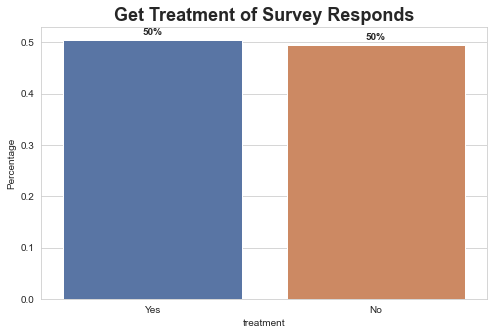

In [94]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,5))
plt.title('Get Treatment of Survey Responds',fontsize=18, fontweight='bold')
res_percentage = (df['treatment'].value_counts(normalize=True).rename_axis('treatment').reset_index(name='Percentage'))
ax = sns.barplot(x='treatment',y='Percentage', data=res_percentage.head(10), palette='deep')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

#### Result Discussion
The first step after cleaning data is to explore the ‘treatment’ column. This column answers the question of “Have you got treatment for a mental health condition”. As a result, we found 50% of employees who are getting mental health treatment, and the other half not getting any mental health treatment. These result shows that tech workplace should promote mental health and support employees with mental health issues. In fact, some studies show that poor mental health can negatively affect employees in different ways such as job performance, productivity, and communication among workers. Our next step is to investigate in the different factors that leading employees want to get mental health treatment.

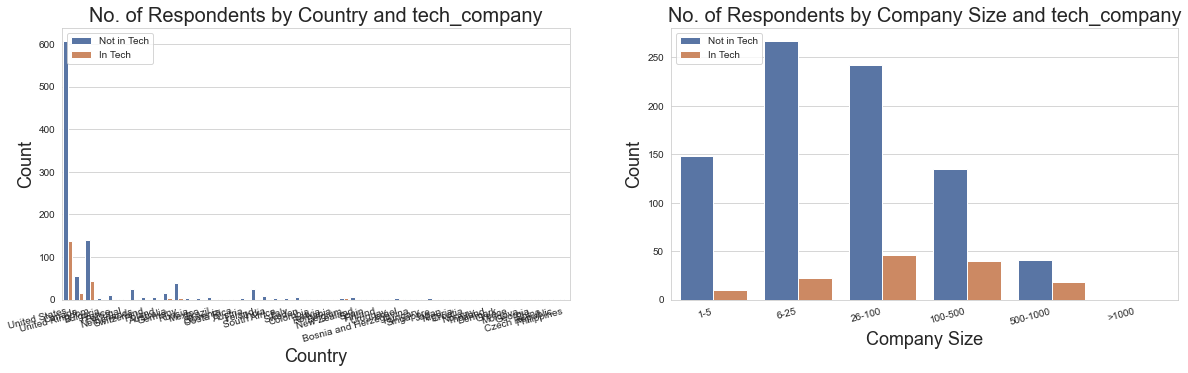

<Figure size 1152x288 with 0 Axes>

In [95]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
plt.figure(figsize = (16,4))
fig.set_figheight(5)
fig.set_figwidth(20)
plt.subplots_adjust(wspace = 0)

# No of respondents by Country
sns.countplot(x = df['Country'], hue = df['tech_company'], ax=ax1, palette="deep")
ax1.set_title('No. of Respondents by Country and tech_company', fontsize = 20)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=15, ha="right")
ax1.set_xlabel('Country', fontsize = 18)
ax1.set_ylabel('Count', fontsize = 18)
ax1.legend(['Not in Tech', 'In Tech'])

# No of respondents by Company Size
sns.countplot(x = df['no_employees'], hue = df['tech_company'], ax=ax2, 
              order = ['1-5', '6-25', '26-100', '100-500', '500-1000', '>1000'], palette="deep")
ax2.set_title('No. of Respondents by Company Size and tech_company', fontsize = 20)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=15, ha="right")
ax2.set_xlabel('Company Size', fontsize = 18)
ax2.set_ylabel('Count', fontsize = 18)
ax2.legend(['Not in Tech', 'In Tech']);